## SPARKS FOUNDATION


### TASK 1- Prediction Using Supervised ML

### Author -  Vivek R Nair

### Importing all Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
student_df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

### EDA on the dataset

In [9]:
student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
student_df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [22]:
student_df.shape

(25, 2)

There are 25 rows and 2 columns in the dataset

In [12]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
student_df.isna().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in the dataset

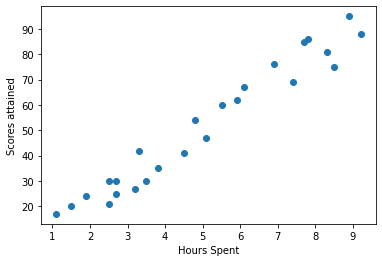

In [69]:
plt.scatter(x=student_df["Hours"],y=student_df["Scores"])
plt.xlabel("Hours Spent")
plt.ylabel("Scores attained")
plt.show()


We can see that there is a positive correlation between the hours spent and the scores attained

### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [34]:
X = student_df.iloc[:, :-1].values
y = student_df.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=25)

### Training the Simple Linear Regression model on the Training set

In [36]:
regressor=LinearRegression()

In [37]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Test set results

In [38]:
y_pred = regressor.predict(X_test)

In [66]:
actual_predicted  = pd.DataFrame({"Actual_Values": y_test, "Predicted_Values ": y_pred})
actual_predicted

,Actual_Values,Predicted_Values
0,27,34.004466
1,25,29.188117
2,24,21.481958
3,85,77.351611
4,54,49.416784
5,42,34.967736
6,21,27.261577
7,88,91.800659


### Visualising the Linear Regression results

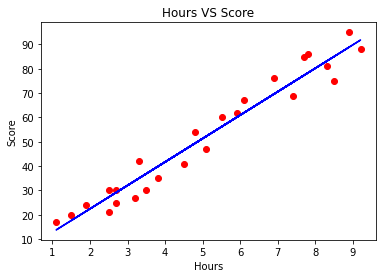

In [86]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Hours VS Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

Here, the red dots are the actual data points and, the blue straight line is what our model has created. It is evident from the diagram above that a Linear model fit our dataset well. 

### Showing the Actual and Predicted results

<AxesSubplot:>

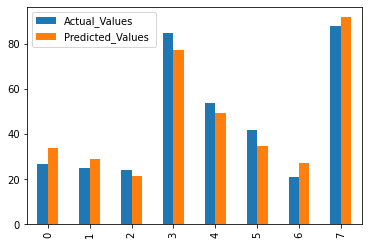

In [68]:
actual_predicted.plot(kind="bar")

### Model Evaluation


In [51]:
regressor.coef_

array([9.63269875])

In [52]:
regressor.intercept_

3.17983012095295

In [81]:
## A function to calculate the adjusted R2 Score
def adj_r2(x,y):
    r2 = regressor.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [87]:
sample = pd.DataFrame({"Hours":[9,4]})
y_sample = regressor.predict(sample)
y_sample

array([89.87411892, 41.71062514])

As per the model, if we spent 9 Hours, the score that we would get is 89.87411892

As per the model, if we spent 4 Hours, the score that we would get is 41.71062514

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
print("Mean Squared Value = ", mean_squared_error(y_test,y_pred))

Mean Squared Value =  31.944027914988


In [56]:
print("Root Mean Squared Value = ", np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Value =  5.651904804133559


In [58]:
print("R2 Score of Train data  = ", regressor.score(X_train,y_train))

R2 Score of Train data  =  0.9515037021190216


In [60]:
print("R2 Score of Test data  = ", regressor.score(X_test,y_test))

R2 Score of Test data  =  0.9515586724822472


In [64]:
print("Adjusted R2 Score of train Data  = " , adj_r2(X_train,y_train))

Adjusted R2 Score of train Data  =  0.948270615593623


In [65]:
print("Adjusted R2 Score of Test Data  = " , adj_r2(X_test,y_test))

Adjusted R2 Score of Test Data  =  0.9434851178959551


### Thank You !!!